In [5]:
import yfinance as yf
import pandas as pd
import os
from pathlib import Path  # Ajout de l'import manquant
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Récupération du dossier "Téléchargements" de l'utilisateur
download_folder = str(Path.home() / "Downloads")

# Création d'un sous-dossier "bourse_top100" dans le dossier Téléchargements
output_folder = os.path.join(download_folder, "bourse_top100")
os.makedirs(output_folder, exist_ok=True)

# Liste des symboles des 100 plus grandes entreprises américaines
companies = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "META", "BRK-B", "UNH", "JNJ",
    "XOM", "V", "PG", "JPM", "MA", "HD", "LLY", "CVX", "MRK", "PEP",
    "ABBV", "KO", "AVGO", "COST", "MCD", "TMO", "WMT", "BAC", "ORCL", "NKE",
    "DIS", "PFE", "ADBE", "CSCO", "NFLX", "CMCSA", "CRM", "TXN", "DHR", "ABT",
    "AMD", "INTC", "NEE", "WFC", "VZ", "LIN", "MS", "ACN", "UPS", "PM",
    "AMGN", "HON", "LOW", "UNP", "BMY", "RTX", "SCHW", "IBM", "COP", "SPGI",
    "QCOM", "T", "PLD", "INTU", "AXP", "CAT", "CVS", "GS", "BLK", "NOW",
    "DE", "MDLZ", "PYPL", "TMUS", "LMT", "ADP", "ELV", "AMT", "C", "ISRG",
    "GILD", "BKNG", "MO", "EW", "GE", "REGN", "ADI", "MMC", "SYK", "CB",
    "ZTS", "CL", "APD", "MNST", "TGT", "CCI", "CI", "CSX", "ICE"
]

# Téléchargement des données pour chaque entreprise
for symbol in companies:
    try:
        print(f"Récupération des données pour {symbol}...")
        data = yf.download(symbol, start="1900-01-01", progress=False)
        if not data.empty:
            file_path = os.path.join(output_folder, f"{symbol}.csv")
            data.to_csv(file_path)
            print(f"Données sauvegardées pour {symbol} dans {file_path}")
        else:
            print(f"Aucune donnée disponible pour {symbol}.")
    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {symbol}: {e}")

print("Récupération des données terminée.")

Récupération des données pour AAPL...
Données sauvegardées pour AAPL dans C:\Users\**\Downloads\bourse_top100\AAPL.csv
Récupération des données pour MSFT...
Données sauvegardées pour MSFT dans C:\Users\**\Downloads\bourse_top100\MSFT.csv
Récupération des données pour GOOGL...
Données sauvegardées pour GOOGL dans C:\Users\**\Downloads\bourse_top100\GOOGL.csv
Récupération des données pour AMZN...
Données sauvegardées pour AMZN dans C:\Users\\Downloads\bourse_top100\AMZN.csv
Récupération des données pour NVDA...
Données sauvegardées pour NVDA dans C:\Users\**\Downloads\bourse_top100\NVDA.csv
Récupération des données pour TSLA...
Données sauvegardées pour TSLA dans C:\Users\**\Downloads\bourse_top100\TSLA.csv
Récupération des données pour META...
Données sauvegardées pour META dans C:\Users\**\Downloads\bourse_top100\META.csv
Récupération des données pour BRK-B...
Données sauvegardées pour BRK-B dans C:\Users\**\Downloads\bourse_top100\BRK-B.csv
Récupération des données pour UNH...
Données

In [5]:
# Spécifie le chemin du dossier contenant les fichiers
folder_path = os.path.expanduser("~/Downloads/bourse_top100")

# Initialise une liste pour stocker les DataFrames
dataframes = []

# Parcours tous les fichiers du dossier
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Vérifie que le fichier est bien un fichier CSV
        file_path = os.path.join(folder_path, file_name)
        try:
            # Lit le fichier CSV
            df = pd.read_csv(file_path)
            
            # Ajoute une colonne pour identifier le fichier source (facultatif)
            df['Source'] = file_name
            
            # Ajoute le DataFrame à la liste
            dataframes.append(df)
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier {file_name}: {e}")

# Combine tous les DataFrames en un seul
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Affiche les premières lignes du DataFrame combiné
    display(combined_df)

    # Si tu veux enregistrer les données combinées dans un fichier CSV :
    output_path = os.path.join(folder_path, 'combined_data.csv')
    combined_df.to_csv(output_path, index=False)
    print(f"Données combinées enregistrées dans : {output_path}")
else:
    print("Aucun fichier CSV trouvé ou aucune donnée valide à combiner.")

,Date,Open,High,Low,Close,Adj Close,Volume,Source,Dividends,Stock Splits,Symbol
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098835,469033600.0,AAPL.csv,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800.0,AAPL.csv,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000.0,AAPL.csv,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600.0,AAPL.csv,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600.0,AAPL.csv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
992380,2025-01-03,162.240005,163.869995,160.589996,163.309998,163.309998,2206400.0,ZTS.csv,NaN,NaN,NaN
992381,2025-01-06,162.770004,167.580002,162.039993,165.899994,165.899994,2733900.0,ZTS.csv,NaN,NaN,NaN
992382,2025-01-07,163.199997,165.500000,161.360001,163.490005,163.490005,2488500.0,ZTS.csv,NaN,NaN,NaN
992383,2025-01-08,162.970001,165.139999,161.380005,165.020004,165.020004,2353200.0,ZTS.csv,NaN,NaN,NaN


Données combinées enregistrées dans : C:\Users\**/Downloads/bourse_top100\combined_data.csv


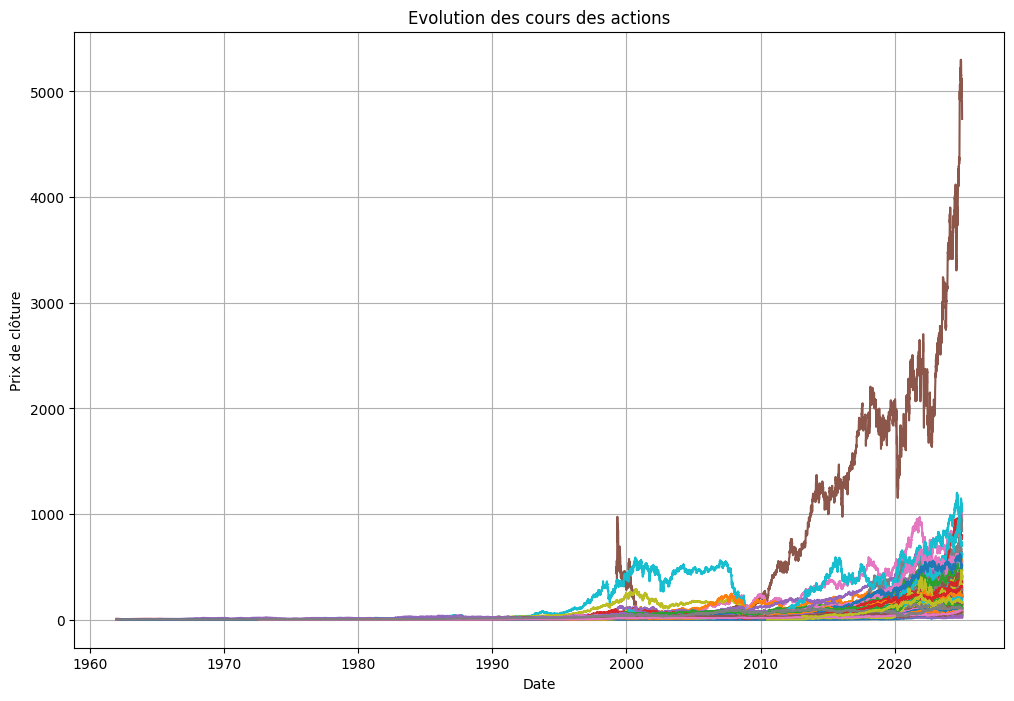

In [8]:
# Spécifie le chemin du dossier contenant les fichiers
folder_path = os.path.expanduser("~/Downloads/bourse_top100")

# Initialise une liste pour stocker les DataFrames
dataframes = []

# Parcours tous les fichiers du dossier
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Vérifie que le fichier est bien un fichier CSV
        file_path = os.path.join(folder_path, file_name)
        try:
            # Lit le fichier CSV
            df = pd.read_csv(file_path)
            
            # Ajoute une colonne pour identifier le fichier source (nom de l'action)
            action_name = file_name.split('.')[0]  # Supprime l'extension
            df['Action'] = action_name
            
            # Ajoute le DataFrame à la liste
            dataframes.append(df)
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier {file_name}: {e}")

# Combine tous les DataFrames en un seul
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Convertit la colonne "Date" en format datetime
    combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

    # Filtre les données pour garder les colonnes essentielles
    filtered_df = combined_df[['Date', 'Close', 'Action']].dropna()

    # Crée un graphique pour chaque action
    plt.figure(figsize=(12, 8))

    for action_name, group in filtered_df.groupby('Action'):
        plt.plot(group['Date'], group['Close'])

    # Personnalise le graphique
    plt.title("Evolution des cours des actions")
    plt.xlabel("Date")
    plt.ylabel("Prix de clôture")
    plt.grid(True)

    # Affiche le graphique
    plt.show()
else:
    print("Aucun fichier CSV trouvé ou aucune donnée valide à afficher.")



In [11]:
# Spécifie le chemin d'accès du dossier contenant les fichiers
folder_path = "C:/Users/**/Downloads/bourse_top100/"

# Liste tous les fichiers du dossier
action_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialiser un dictionnaire pour stocker les rendements
rendements = {}

# Charger les données pour chaque action
for action_file in action_files:
    action_name = action_file.split('.')[0]
    action_data = pd.read_csv(os.path.join(folder_path, action_file))

    # Convertir la colonne Date en datetime
    action_data['Date'] = pd.to_datetime(action_data['Date'])
    
    # Calculer les rendements basés sur la colonne 'Close'
    action_data['Rendement'] = action_data['Close'].pct_change()
    
    # Ajouter les rendements de l'action au dictionnaire
    rendements[action_name] = action_data['Rendement']

# Créer un DataFrame avec les rendements de toutes les actions
rendements_df = pd.DataFrame(rendements)

# Calculer la matrice de corrélation
correlation_matrix = rendements_df.corr()

# Supprimer les autocorrélations (corrélations de 1.0)
correlation_matrix = correlation_matrix.where(~correlation_matrix.isin([1.0]))

# Afficher les corrélations supérieures à 0.5 et inférieures à -0.5
print("Corrélations supérieures à 0.5 :")
for i, row in enumerate(correlation_matrix.columns):
    for j, col in enumerate(correlation_matrix.columns):
        if i < j:  # Pour ne pas refaire la comparaison à l'envers (éviter AXP-WFC et WFC-AXP)
            value = correlation_matrix.iloc[i, j]
            if value > 0.5:
                print(f"{row} - {col}: {value}")

print("\nCorrélations inférieures à -0.5 :")
for i, row in enumerate(correlation_matrix.columns):
    for j, col in enumerate(correlation_matrix.columns):
        if i < j:  # Pour ne pas refaire la comparaison à l'envers (éviter AXP-WFC et WFC-AXP)
            value = correlation_matrix.iloc[i, j]
            if value < -0.5:
                print(f"{row} - {col}: {value}")

Corrélations supérieures à 0.5 :
AXP - WFC: 0.5152647308396205
CVX - XOM: 0.6922784664539791
T - VZ: 0.6602366116755936

Corrélations inférieures à -0.5 :


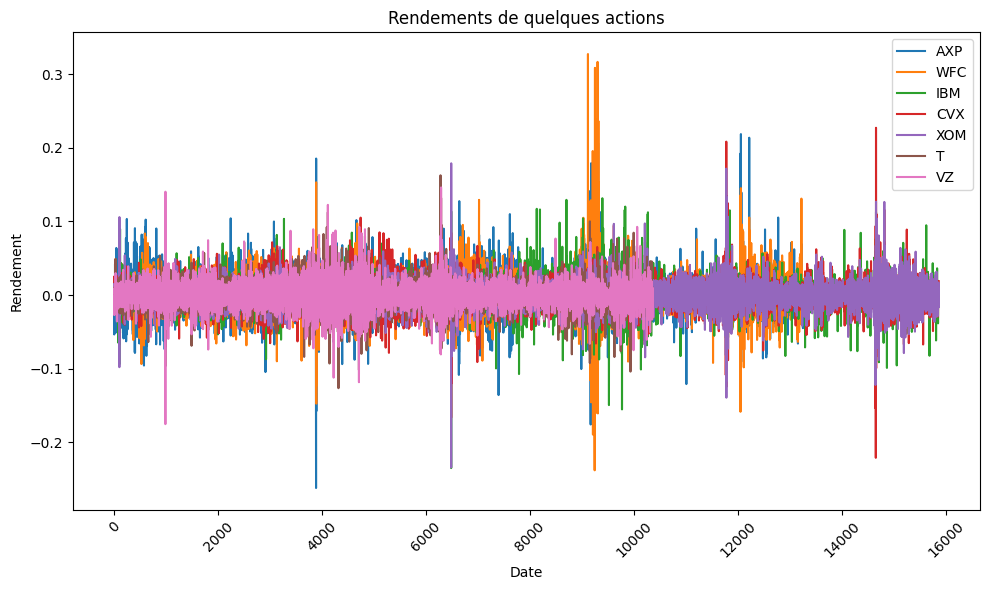

In [30]:
folder_path = "C:/Users/**/Downloads/bourse_top100/"

action_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

rendements = {}

for action_file in action_files:
    action_name = action_file.split('.')[0]
    action_data = pd.read_csv(os.path.join(folder_path, action_file))

    action_data['Date'] = pd.to_datetime(action_data['Date'])
    
    action_data['Rendement'] = action_data['Close'].pct_change()
    
    rendements[action_name] = action_data['Rendement']
    
    globals()[action_name] = action_data['Rendement']
actions_to_display = ['AXP', 'WFC', 'IBM', 'CVX', 'XOM', 'T', 'VZ']

plt.figure(figsize=(10, 6))

for action in actions_to_display:
    if action in globals():
        plt.plot(globals()[action], label=action)

plt.xlabel('Date')
plt.ylabel('Rendement')
plt.title('Rendements de quelques actions')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
folder_path = "C:/Users/**/Downloads/bourse_top100/"

actions_voulues = ['AXP', 'WFC', 'IBM', 'CVX', 'XOM', 'T', 'VZ']

rendements = {}

for action_name in actions_voulues:
    action_file = f"{action_name}.csv"
    
    action_data = pd.read_csv(os.path.join(folder_path, action_file))
    
    action_data['Date'] = pd.to_datetime(action_data['Date'])
    
    action_data['Rendement'] = action_data['Close'].pct_change()
    
    rendements[action_name] = action_data['Rendement']

rendements_df = pd.DataFrame(rendements)

rendements_df = rendements_df.dropna()

matrice_covariance = rendements_df.cov()

print("Matrice de covariance des rendements des actions AXP, WFC et IBM... :")
print(matrice_covariance)

matrice_covariance.to_csv("matrice_covariance.csv")

Matrice de covariance des rendements des actions AXP, WFC et IBM... :
              AXP           WFC           IBM       CVX           XOM  \
AXP  5.165685e-04  2.341709e-04 -6.130314e-06 -0.000005 -2.216536e-06   
WFC  2.341709e-04  4.561895e-04  5.820457e-07 -0.000003 -3.680196e-06   
IBM -6.130314e-06  5.820457e-07  2.772624e-04  0.000068  7.115820e-05   
CVX -4.977714e-06 -2.757263e-06  6.828850e-05  0.000239  1.213592e-04   
XOM -2.216536e-06 -3.680196e-06  7.115820e-05  0.000121  1.821282e-04   
T    5.315881e-07 -2.640952e-06 -1.209809e-06  0.000005  2.634546e-06   
VZ   3.103063e-07 -3.680078e-06 -1.991321e-06  0.000002  9.277151e-07   

                T            VZ  
AXP  5.315881e-07  3.103063e-07  
WFC -2.640952e-06 -3.680078e-06  
IBM -1.209809e-06 -1.991321e-06  
CVX  4.621119e-06  2.398629e-06  
XOM  2.634546e-06  9.277151e-07  
T    2.457125e-04  1.550931e-04  
VZ   1.550931e-04  2.245735e-04  


In [28]:
folder_path = "C:/Users/**/Downloads/bourse_top100/"

actions_voulues = ['AXP', 'WFC', 'IBM', 'CVX', 'XOM', 'T', 'VZ']

rendements = {}

for action_name in actions_voulues:
    action_file = f"{action_name}.csv"
    
    action_data = pd.read_csv(os.path.join(folder_path, action_file))
    
    action_data['Date'] = pd.to_datetime(action_data['Date'])
    
    action_data['Rendement'] = action_data['Close'].pct_change()
    
    rendements[action_name] = action_data['Rendement']

rendements_df = pd.DataFrame(rendements)

rendements_df = rendements_df.dropna()

matrice_covariance = rendements_df.cov()

print("Matrice de covariance des rendements des actions AXP, WFC et IBM :")
print(matrice_covariance)

matrice_covariance_inv = np.linalg.inv(matrice_covariance)

print("\nInverse de la matrice de covariance des rendements des actions AXP, WFC et IBM :")
print(matrice_covariance_inv)

matrice_covariance_inv_df = pd.DataFrame(matrice_covariance_inv, columns=rendements_df.columns, index=rendements_df.columns)
matrice_covariance_inv_df.to_csv("matrice_covariance_inv.csv")

Matrice de covariance des rendements des actions AXP, WFC et IBM :
              AXP           WFC           IBM       CVX           XOM  \
AXP  5.165685e-04  2.341709e-04 -6.130314e-06 -0.000005 -2.216536e-06   
WFC  2.341709e-04  4.561895e-04  5.820457e-07 -0.000003 -3.680196e-06   
IBM -6.130314e-06  5.820457e-07  2.772624e-04  0.000068  7.115820e-05   
CVX -4.977714e-06 -2.757263e-06  6.828850e-05  0.000239  1.213592e-04   
XOM -2.216536e-06 -3.680196e-06  7.115820e-05  0.000121  1.821282e-04   
T    5.315881e-07 -2.640952e-06 -1.209809e-06  0.000005  2.634546e-06   
VZ   3.103063e-07 -3.680078e-06 -1.991321e-06  0.000002  9.277151e-07   

                T            VZ  
AXP  5.315881e-07  3.103063e-07  
WFC -2.640952e-06 -3.680078e-06  
IBM -1.209809e-06 -1.991321e-06  
CVX  4.621119e-06  2.398629e-06  
XOM  2.634546e-06  9.277151e-07  
T    2.457125e-04  1.550931e-04  
VZ   1.550931e-04  2.245735e-04  

Inverse de la matrice de covariance des rendements des actions AXP, WFC et 

In [27]:
matrice_covariance_inv = np.array([
    [2.52441574e+03, -1.29622614e+03,  5.96776180e+01,  4.59147085e+01, -4.91787896e+01, -7.05469876e+00, -1.96153614e+01],
    [-1.29622614e+03,  2.85837849e+03, -4.85798348e+01, -1.73792411e+01,  7.22504229e+01,  4.40851178e+00,  4.50430332e+01],
    [ 5.96776180e+01, -4.85798348e+01,  4.05560412e+03, -5.35538861e+02, -1.22844258e+03,  2.41144473e+01,  2.92239864e+01],
    [ 4.59147085e+01, -1.73792411e+01, -5.35538861e+02,  6.40498060e+03, -4.05730065e+03, -7.81093782e+01, -2.80335735e+00],
    [-4.91787896e+01,  7.22504229e+01, -1.22844258e+03, -4.05730065e+03,  8.67540315e+03, -3.63860780e+01,  2.29849472e+01],
    [-7.05469876e+00,  4.40851178e+00,  2.41144473e+01, -7.81093782e+01, -3.63860780e+01,  7.21701478e+03, -4.98287512e+03],
    [-1.96153614e+01,  4.50430332e+01,  2.92239864e+01, -2.80335735e+00,  2.29849472e+01, -4.98287512e+03,  7.89507637e+03]
])

n = matrice_covariance_inv.shape[0]

ones = np.ones((n, 1))

poids_optimal = np.linalg.inv(np.dot(np.dot(ones.T, matrice_covariance_inv), ones)) * np.dot(matrice_covariance_inv, ones)

poids_optimal = poids_optimal.flatten()
actions_voulues = ['AXP', 'WFC', 'IBM', 'CVX', 'XOM', 'T', 'VZ']

print("Poids optimaux des actifs :")
for action, poids in zip(actions_voulues, poids_optimal):
    print(f"{action}: {poids:.4f}")

Poids optimaux des actifs :
AXP: 0.0811
WFC: 0.1043
IBM: 0.1518
CVX: 0.1134
XOM: 0.2190
T: 0.1380
VZ: 0.1925


In [26]:
poids_optimal = np.array([0.0811, 0.1043, 0.1518, 0.1134, 0.2190, 0.1380, 0.1925])

poids_optimal_sum = np.sum(poids_optimal)

poids_optimal_sum

1.0001

Text(0.15, 0.7, 'Risque (Volatilité): 26.61%')

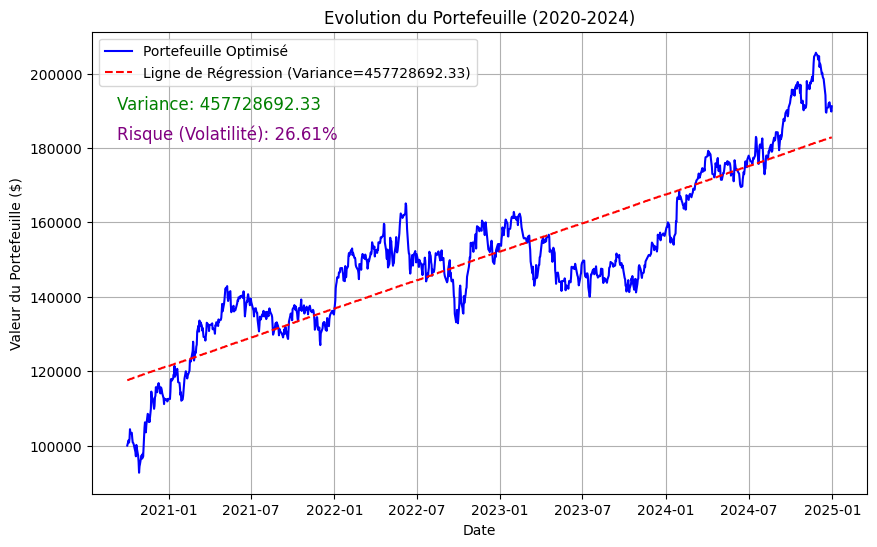

In [6]:
# Initialisation du dossier et des actions
folder_path = "C:/Users/**/Downloads/bourse_top100/"

actions_voulues = ['AXP', 'WFC', 'IBM', 'CVX', 'XOM', 'T', 'VZ']
poids_optimal = np.array([0.0811, 0.1043, 0.1518, 0.1134, 0.2190, 0.1380, 0.1925])

prix_cloture = {}

# Chargement des données
for action_name in actions_voulues:
    action_file = f"{action_name}.csv"
    
    action_data = pd.read_csv(os.path.join(folder_path, action_file))
    
    action_data['Date'] = pd.to_datetime(action_data['Date'])
    
    action_data = action_data[(action_data['Date'] >= '2020-10-01') & (action_data['Date'] <= '2024-12-31')]
    
    prix_cloture[action_name] = action_data[['Date', 'Close']]

# Création du DataFrame des prix de clôture
prix_cloture_df = pd.DataFrame({action: data.set_index('Date')['Close'] for action, data in prix_cloture.items()})

# Calcul des rendements
rendements_df = prix_cloture_df.pct_change().dropna()

# Initialisation du portefeuille
investissement_initial = 100000
valeur_portefeuille = pd.Series(index=rendements_df.index, dtype=float)
valeur_portefeuille.iloc[0] = investissement_initial

# Calcul de la valeur du portefeuille
for i in range(1, len(rendements_df)):
    variation_portefeuille = np.dot(rendements_df.iloc[i], poids_optimal)
    valeur_portefeuille.iloc[i] = valeur_portefeuille.iloc[i - 1] * (1 + variation_portefeuille)

# Régression linéaire
x = np.arange(len(valeur_portefeuille))
y = valeur_portefeuille.values

slope, intercept, _, _, _ = linregress(x, y)
regression_line = slope * x + intercept

# Calcul de la variance
variance = np.var(valeur_portefeuille)

# Calcul de l'écart-type des rendements quotidiens
ecart_type_quotidien = rendements_df.std().mean()

# Annualisation de l'écart-type (en supposant 252 jours de marché par an)
ecart_type_annuel = ecart_type_quotidien * np.sqrt(252)

# Volatilité en pourcentage
volatilite_pourcentage = ecart_type_annuel * 100

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.plot(valeur_portefeuille.index, valeur_portefeuille, label='Portefeuille Optimisé', color='blue')
plt.plot(valeur_portefeuille.index, regression_line, label=f'Ligne de Régression (Variance={variance:.2f})', color='red', linestyle='--')
plt.title("Evolution du Portefeuille (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Valeur du Portefeuille ($)")
plt.legend()
plt.grid(True)

# Affichage de la variance et du risque sous forme de texte
plt.figtext(0.15, 0.75, f"Variance: {variance:.2f}", fontsize=12, color='green')
plt.figtext(0.15, 0.70, f"Risque (Volatilité): {volatilite_pourcentage:.2f}%", fontsize=12, color='purple')